In [99]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [98]:
df_train = pd.read_csv("downloads/train.csv")
df_train.shape

(891, 12)

In [97]:
df_train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [96]:
df_train.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [18]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [95]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
df_train.shape

(891, 8)

In [119]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin'] not found in axis"

In [110]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [111]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        
        elif Pclass ==2:
                return 29
        else:
                return 24
    else:
        return Age

In [112]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [89]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [113]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [114]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [115]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [116]:
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [117]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [122]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [120]:
df_train_dummied = df_train_dummied.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin'] not found in axis"

In [123]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

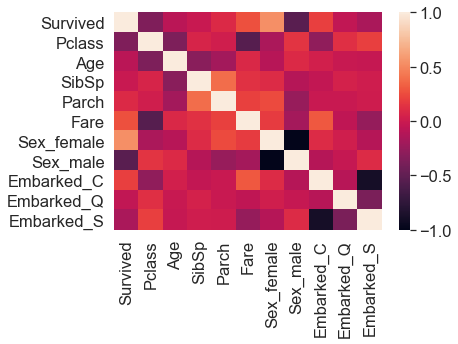

In [125]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [127]:
used_features = ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(498, 9)
(214, 9)
(498,)
(214,)


In [131]:
LogReg = LogisticRegression()

In [132]:
LogReg.fit(X_train,y_train)

C:\Users\uj321\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
y_pred = LogReg.predict(X_test)

In [134]:
metrics.confusion_matrix(y_test,y_pred)

array([[102,  24],
       [ 22,  66]], dtype=int64)

In [136]:
metrics.accuracy_score(y_test,y_pred)

0.7850467289719626

In [137]:
len(X_test)

214

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       126
           1       0.73      0.75      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [140]:
LogReg.coef_

array([[-1.1819066 , -0.04541472, -0.36076591, -0.05290727,  1.29049989,
        -1.2906621 ,  0.29139662, -0.36766125,  0.07610242]])

In [141]:
LogReg.intercept_

array([3.97471778])

In [142]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [143]:
LogReg.predict_proba(X_test)

array([[0.03151451, 0.96848549],
       [0.55171148, 0.44828852],
       [0.8866705 , 0.1133295 ],
       [0.10008963, 0.89991037],
       [0.17342481, 0.82657519],
       [0.87211679, 0.12788321],
       [0.31077976, 0.68922024],
       [0.23104955, 0.76895045],
       [0.87224208, 0.12775792],
       [0.66676916, 0.33323084],
       [0.82769683, 0.17230317],
       [0.61456327, 0.38543673],
       [0.83244098, 0.16755902],
       [0.89115453, 0.10884547],
       [0.75230754, 0.24769246],
       [0.93661114, 0.06338886],
       [0.90368291, 0.09631709],
       [0.8820262 , 0.1179738 ],
       [0.90346057, 0.09653943],
       [0.9488289 , 0.0511711 ],
       [0.6791087 , 0.3208913 ],
       [0.20708661, 0.79291339],
       [0.93947198, 0.06052802],
       [0.90368291, 0.09631709],
       [0.84473061, 0.15526939],
       [0.25681367, 0.74318633],
       [0.86709512, 0.13290488],
       [0.61603219, 0.38396781],
       [0.31077976, 0.68922024],
       [0.6566033 , 0.3433967 ],
       [0.